In [42]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [44]:
df = pd.read_csv('Tata-steel.csv')
df

,Date,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open
0,03-Jul-15,308.00,308.00,299.75,300.95,302.708180,499554,6430,151219082,118810.0,23.78,8.25,-7.05
1,06-Jul-15,294.90,299.60,292.30,298.75,295.646338,663354,9184,196118181,117663.0,17.74,7.30,3.85
2,07-Jul-15,300.75,303.25,296.00,297.45,299.477691,877207,8581,262703927,211277.0,24.09,7.25,-3.30
3,08-Jul-15,293.80,294.00,282.00,283.40,286.875105,1446189,20272,414875621,563505.0,38.96,12.00,-10.40
4,09-Jul-15,285.20,287.25,279.60,280.55,282.860975,974983,13946,275784642,330248.0,33.87,7.65,-4.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1480,28-Jun-21,1174.95,1189.20,1163.20,1184.05,1179.142175,749944,14773,884290599,112782.0,15.04,26.00,9.10
1481,29-Jun-21,1186.00,1195.00,1165.50,1172.45,1177.493063,675052,18471,794869047,197679.0,29.28,29.50,-13.55
1482,30-Jun-21,1179.50,1190.95,1162.50,1166.85,1180.272142,326616,8916,385495766,44078.0,13.50,28.45,-12.65
1483,01-Jul-21,1170.05,1176.55,1156.90,1163.35,1166.601920,351105,10332,409599767,66928.0,19.06,19.65,-6.70


In [48]:
df.isnull().sum()
df.isna().any()

Date                         False
Open Price                   False
High Price                   False
Low Price                    False
Close Price                  False
WAP                          False
No.of Shares                 False
No. of Trades                False
Total Turnover (Rs.)         False
Deliverable Quantity          True
% Deli. Qty to Traded Qty     True
Spread High-Low              False
Spread Close-Open            False
dtype: bool

<Axes: >

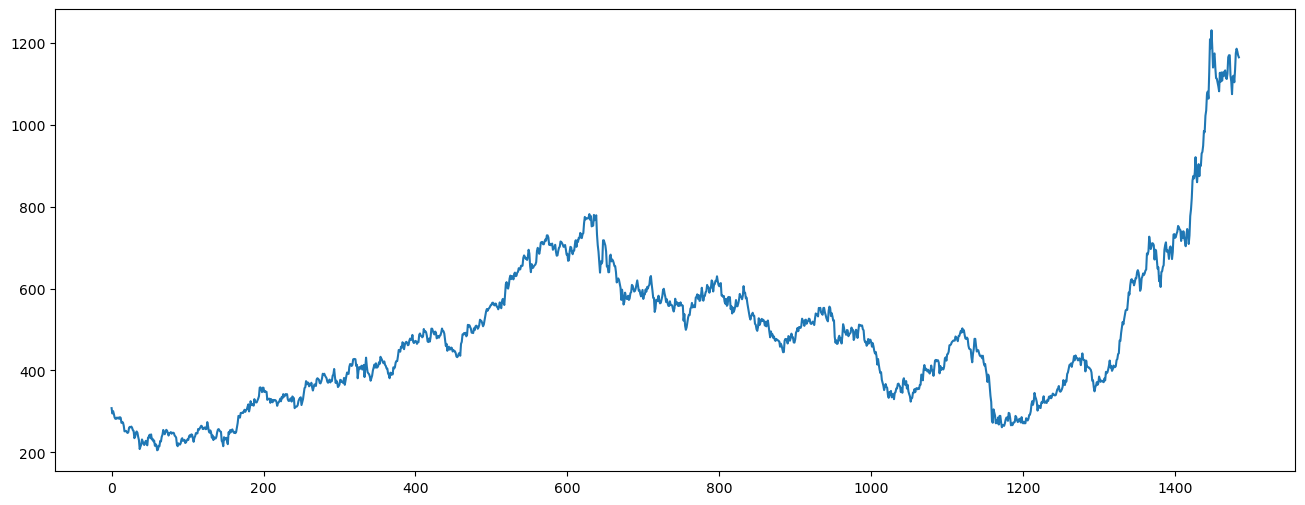

In [52]:
df['Open Price'].plot(figsize=(16,6))

In [56]:
df['Date'] = pd.to_datetime(df['Date'])
df['Date_ordinal'] = df['Date'].apply(lambda x: x.toordinal())
X = df[['Date_ordinal']] 
y = df['Close Price']

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [60]:
model = LinearRegression()

In [62]:
model.fit(X_train, y_train)

LinearRegression()

In [64]:
y_pred = model.predict(X_test)


In [66]:
next_month_dates_ordinal = np.array([df['Date'].max() + pd.Timedelta(days=i) for i in range(1, 31)]).astype('datetime64[D]').astype(int) + 719163
next_month_pred = model.predict(next_month_dates_ordinal.reshape(-1, 1))

C:\Users\VILAS\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [68]:
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 31129.18828742188


In [70]:
X_test_dates = [datetime.fromordinal(int(date)) for date in X_test['Date_ordinal']]
next_month_dates = [datetime.fromordinal(date) for date in next_month_dates_ordinal]

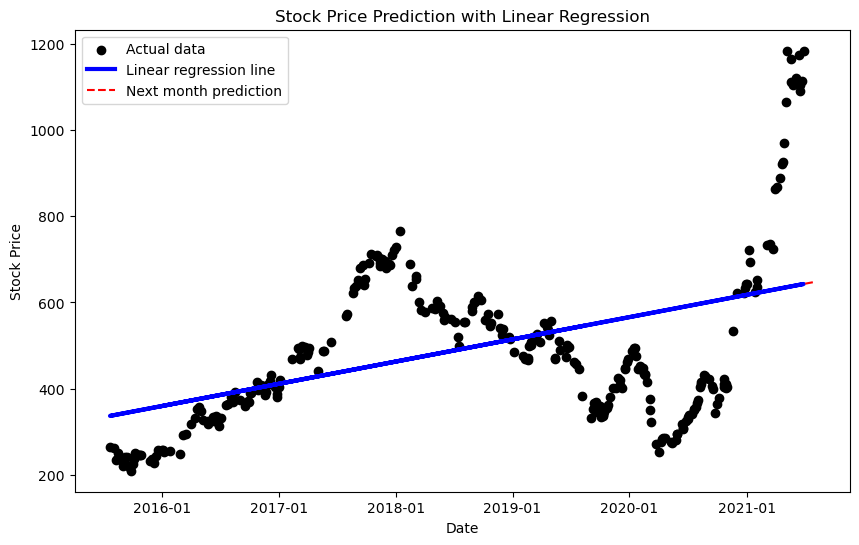

In [76]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test_dates, y_test, color='black', label='Actual data')
plt.plot(X_test_dates, y_pred, color='blue', linewidth=3, label='Linear regression line')
plt.plot(next_month_dates, next_month_pred, color='red', linestyle='dashed', label='Next month prediction')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Stock Price Prediction with Linear Regression')
plt.legend()
plt.show()

In [78]:
next_month_df = pd.DataFrame({
    'Date': next_month_dates,
    'Predicted_Close': next_month_pred
})

print(next_month_df)

         Date  Predicted_Close
0  2021-07-03       643.481407
1  2021-07-04       643.622742
2  2021-07-05       643.764078
3  2021-07-06       643.905414
4  2021-07-07       644.046749
5  2021-07-08       644.188085
6  2021-07-09       644.329420
7  2021-07-10       644.470756
8  2021-07-11       644.612092
9  2021-07-12       644.753427
10 2021-07-13       644.894763
11 2021-07-14       645.036098
12 2021-07-15       645.177434
13 2021-07-16       645.318769
14 2021-07-17       645.460105
15 2021-07-18       645.601441
16 2021-07-19       645.742776
17 2021-07-20       645.884112
18 2021-07-21       646.025447
19 2021-07-22       646.166783
20 2021-07-23       646.308119
21 2021-07-24       646.449454
22 2021-07-25       646.590790
23 2021-07-26       646.732125
24 2021-07-27       646.873461
25 2021-07-28       647.014796
26 2021-07-29       647.156132
27 2021-07-30       647.297468
28 2021-07-31       647.438803
29 2021-08-01       647.580139
